# Intro

In this notebook, I read all the result files from each competitor method to create a summary figure.
The metrics I use are RMSE and Pearson correlation on the expression and log2FC.
The experiments I perform comparisons on are: None stimulated, All stimulated, cell-type specific stimulation

In [2]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess
from method_comparison import validation_plotting as vp


In [3]:
## parameters
aug_data_path = f"{os.getcwd()}/../data/single_cell_data/augmented_kidney_data/"
res_data_path = f"{os.getcwd()}/../results/single_cell_data/buddiM2_kidney/"
#cibersort_genes_path = (f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/" +
#                        "CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_phenoclasses" +
#                        ".CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_refsample.bm.K999.txt")

# cibersort results
#cibersort_file_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job18_Results.csv"

# bp results
#bp_res_path = f"{os.getcwd()}/../results/single_cell_data/bp_kang/"

# DiffExp results
#de_res_path = f"{os.getcwd()}/../data/single_cell_data/kang_rybakov/kang_DE_paper.tsv"

num_genes = 7000


In [4]:
exp_type = "all-kidney"

buddi_file = os.path.join(res_data_path, f"{exp_type}_pearson_matr.csv")
cvae_file = os.path.join(res_data_path, f"{exp_type}_pearson_CVAE.csv")

buddi_df = pd.read_csv(buddi_file, sep=",")
cvae_df = pd.read_csv(cvae_file, sep=",")


# format the corr
buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]

plot_df = pd.concat([buddi_df, cvae_df])




In [5]:
plot_df

,sample_id,cell_type,bulk_type,expr_r2,log2FC_r2,log2FC_r2_bottom,log2FC_r2_mid,log2FC_r2_top,log2FC_rmse,method
0,samp2,proximal_brush,cell_type_specific,0.972728,0.783570,0.658242,0.883433,0.943872,1.582769,BuDDI
1,samp2,fibroblast_mesangial,cell_type_specific,0.723056,0.594785,0.558775,0.571290,0.573358,2.836092,BuDDI
2,samp2,kidney_distal_convoluted_tubule_epithelial_cell,cell_type_specific,0.771428,0.595829,0.568745,0.589211,0.651143,2.360764,BuDDI
3,samp2,podocyte,cell_type_specific,0.782818,0.612301,0.532682,0.633235,0.716521,2.451574,BuDDI
4,samp2,Lymphocytes,cell_type_specific,0.566924,0.598795,0.537265,0.571090,0.564679,2.514258,BuDDI
5,samp2,kidney_collecting_duct_principal_cell,cell_type_specific,0.762720,0.638487,0.579529,0.700900,0.696041,2.264067,BuDDI
6,samp2,kidney_loop_of_Henle_thick_ascending_limb_epit...,cell_type_specific,0.886185,0.679260,0.571400,0.758628,0.818883,2.132405,BuDDI
7,samp2,fenestrated_artery_capillary,cell_type_specific,0.848568,0.701370,0.606617,0.746449,0.810287,2.123981,BuDDI
8,samp2,macrophage,cell_type_specific,0.683578,0.629726,0.551893,0.615379,0.653058,2.328568,BuDDI
9,samp3,proximal_brush,cell_type_specific,0.970289,0.787309,0.664732,0.902335,0.957094,1.652108,BuDDI


In [6]:
s = plot_df.groupby(["method"]).agg({'expr_r2': ['median', 'std'],
                                 'log2FC_r2': ['median', 'std'],
                                 'log2FC_rmse': ['median', 'std']})

s = s.style.format('{:.3f}')
s


In [9]:
a2 = plot_df.groupby(["method"])["expr_r2", "log2FC_r2", "log2FC_rmse"].std()


<ipython-input-9-2eec0688e9f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a2 = plot_df.groupby(["method"])["expr_r2", "log2FC_r2", "log2FC_rmse"].std()


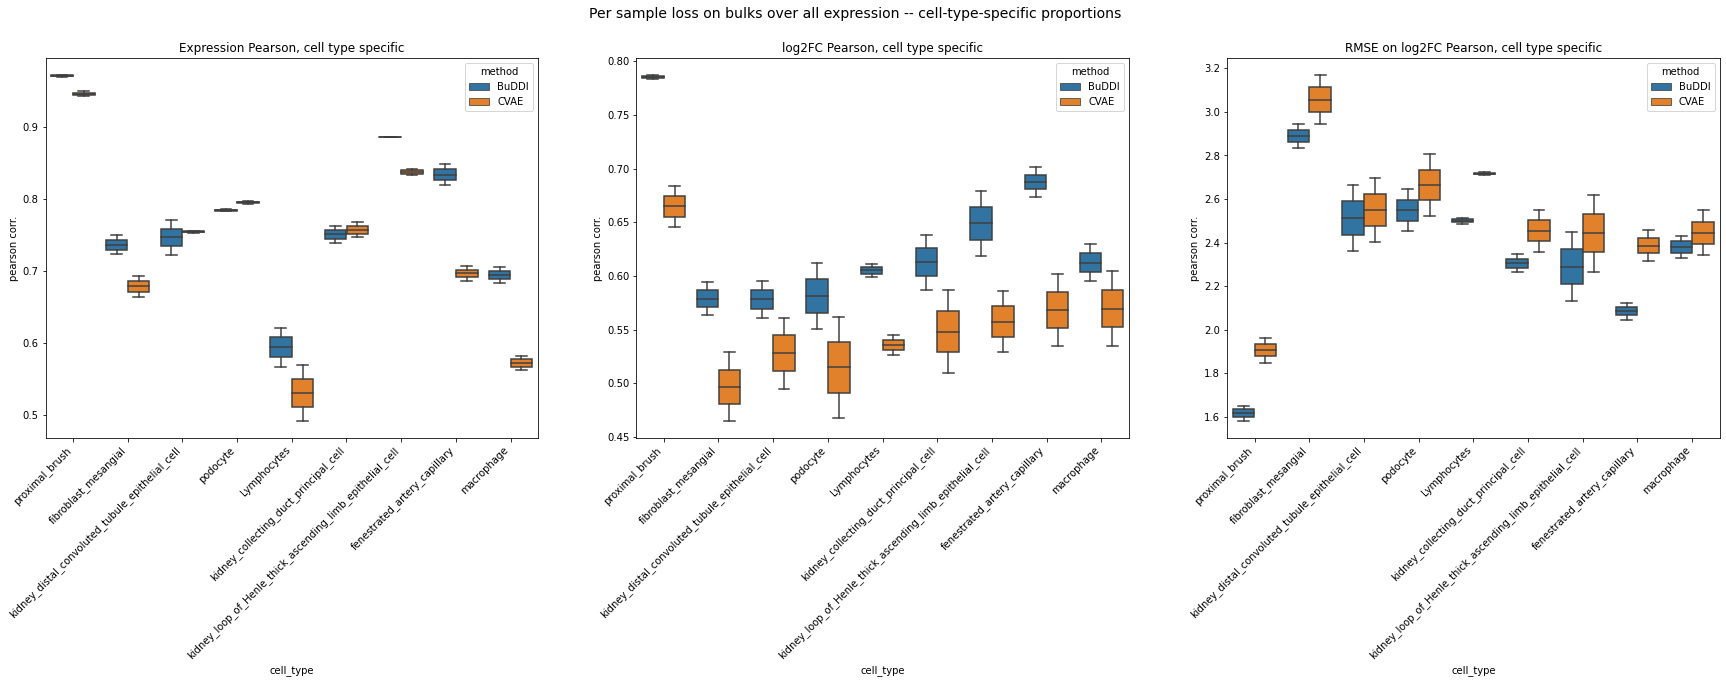

In [11]:

# plot
fig, axs = plt.subplots(1, 3, figsize=(30,7))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="expr_r2",
            hue="method", ax= axs[0])
axs[0].set_title("Expression Pearson, cell type specific")
axs[0].set(ylabel="pearson corr.")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2",
            hue="method", ax= axs[1])
axs[1].set_title("log2FC Pearson, cell type specific")
axs[1].set(ylabel="pearson corr.")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_rmse",
            hue="method", ax= axs[2])
axs[2].set_title("RMSE on log2FC, cell type specific")
axs[2].set(ylabel="RMSE")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, horizontalalignment='right')


fig.suptitle("Per sample loss on bulks over all expression -- cell-type-specific proportions", fontsize=14)

fig.show()



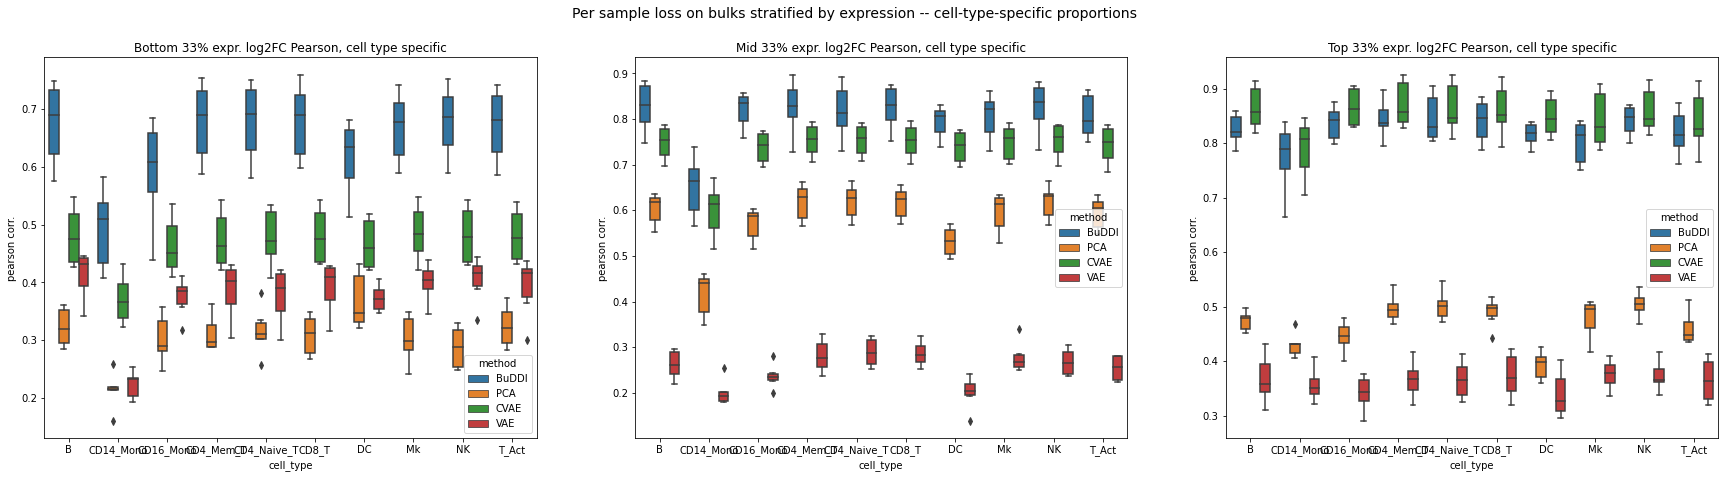

In [5]:

fig, axs = plt.subplots(1, 3, figsize=(30,7))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_bottom",
            hue="method", ax= axs[0])
axs[0].set_title("Bottom 33% expr. log2FC Pearson, cell type specific")
axs[0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_mid",
            hue="method", ax= axs[1])
axs[1].set_title("Mid 33% expr. log2FC Pearson, cell type specific")
axs[1].set(ylabel="pearson corr.")



sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_top",
            hue="method", ax= axs[2])
axs[2].set_title("Top 33% expr. log2FC Pearson, cell type specific")
axs[2].set(ylabel="pearson corr.")



fig.suptitle("Per sample loss on bulks stratified by expression -- cell-type-specific proportions", fontsize=14)

fig.show()


